In [149]:
# Import dependencies and setup
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
import matplotlib as maplotlib
 
%matplotlib inline
 
plt.rcParams['figure.figsize']=(15,5)

In [150]:
# Load and preview dataset

raw_df = pd.read_csv('./Resources/inflation.csv', index_col='Year', parse_dates=True)
raw_df

,Percentage Change from Previous Quarter
Year,
1949-09-01,10.8
1949-12-01,7.9
1950-03-01,7.7
1950-06-01,7.5
1950-09-01,7.3
...,...
2021-03-01,1.1
2021-06-01,3.8
2021-09-01,3.0


In [151]:
# Remove rows with 'NaN' values
raw_df.loc[~(raw_df==0).all(axis=1)]

,Percentage Change from Previous Quarter
Year,
1949-09-01,10.8
1949-12-01,7.9
1950-03-01,7.7
1950-06-01,7.5
1950-09-01,7.3
...,...
2021-03-01,1.1
2021-06-01,3.8
2021-09-01,3.0


In [152]:
# Prepare for Prophet
# Reset index

df = raw_df.reset_index()
df.head()

,Year,Percentage Change from Previous Quarter
0,1949-09-01,10.8
1,1949-12-01,7.9
2,1950-03-01,7.7
3,1950-06-01,7.5
4,1950-09-01,7.3


In [153]:
# Rename 'Year' and 'Percentage change...' to 'ds' and 'y', respectively

df = df.rename(columns={'Year':'ds', 'Percentage Change from Previous Quarter':'y'})
df.head()

,ds,y
0,1949-09-01,10.8
1,1949-12-01,7.9
2,1950-03-01,7.7
3,1950-06-01,7.5
4,1950-09-01,7.3


<AxesSubplot:xlabel='ds'>

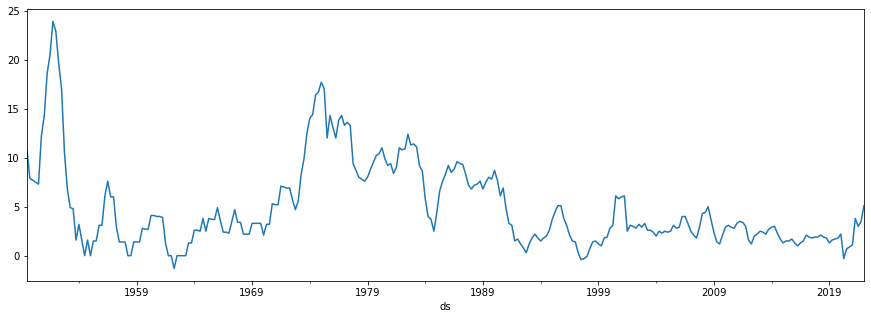

In [154]:
# Set index and preview plot

df.set_index('ds').y.plot()

In [155]:
# Determine if a trend exist via log-transform

df['y'] = np.log(df['y'])
df.tail()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,ds,y
286,2021-03-01,0.095310
287,2021-06-01,1.335001
288,2021-09-01,1.098612
289,2021-12-01,1.252763
290,2022-03-01,1.629241


<AxesSubplot:xlabel='ds'>

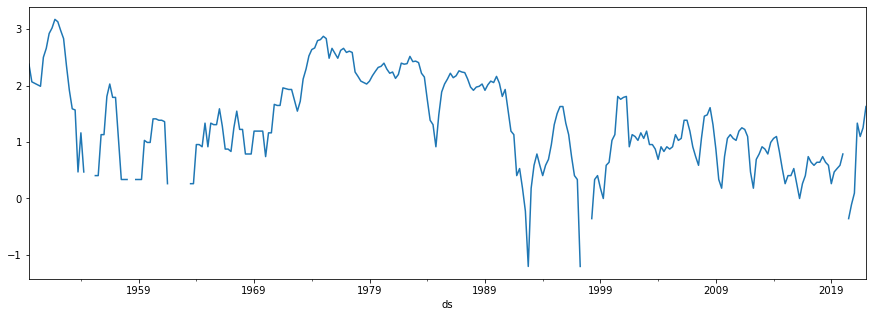

In [156]:
# Set 'ds' as index

df.set_index('ds').y.plot()

In [157]:
# Remove rows with 'NaN' / infinity values
trimmed_df = df.replace([np.inf, -np.inf], np.nan, inplace=True)
trimmed_df = df.dropna(subset=["y"], how="all")

In [158]:
# Create model

model = Prophet(weekly_seasonality=True, daily_seasonality=True)
model.fit(trimmed_df);

/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [159]:
# Add future dates to model (5 years / 20 quarters)

future = model.make_future_dataframe(periods=20, freq = 'q')
future.tail()

,ds
291,2025-12-31
292,2026-03-31
293,2026-06-30
294,2026-09-30
295,2026-12-31


In [160]:
# Forecast and run through Prophet model

forecast = model.predict(future)
forecast.tail()

/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
291,2025-12-31,1.101405,0.125942,1.833290,1.097822,1.104802,-0.124103,-0.124103,-0.124103,-0.416302,...,0.030372,0.030372,0.030372,0.261827,0.261827,0.261827,0.0,0.0,0.0,0.977302
292,2026-03-31,1.094884,-0.236134,1.430728,1.090769,1.098561,-0.502426,-0.502426,-0.502426,-0.416302,...,-0.236155,-0.236155,-0.236155,0.150031,0.150031,0.150031,0.0,0.0,0.0,0.592459
293,2026-06-30,1.088291,-0.280145,1.434892,1.083616,1.092264,-0.498736,-0.498736,-0.498736,-0.416302,...,-0.236155,-0.236155,-0.236155,0.153721,0.153721,0.153721,0.0,0.0,0.0,0.589555
294,2026-09-30,1.081625,-0.012127,1.755047,1.076385,1.086025,-0.204498,-0.204498,-0.204498,-0.416302,...,0.030372,0.030372,0.030372,0.181431,0.181431,0.181431,0.0,0.0,0.0,0.877127
295,2026-12-31,1.074960,0.160715,1.836604,1.069275,1.079931,-0.075716,-0.075716,-0.075716,-0.416302,...,0.084586,0.084586,0.084586,0.255999,0.255999,0.255999,0.0,0.0,0.0,0.999244


In [161]:
# Drop surplus columns

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
291,2025-12-31,0.977302,0.125942,1.833290
292,2026-03-31,0.592459,-0.236134,1.430728
293,2026-06-30,0.589555,-0.280145,1.434892
294,2026-09-30,0.877127,-0.012127,1.755047
295,2026-12-31,0.999244,0.160715,1.836604


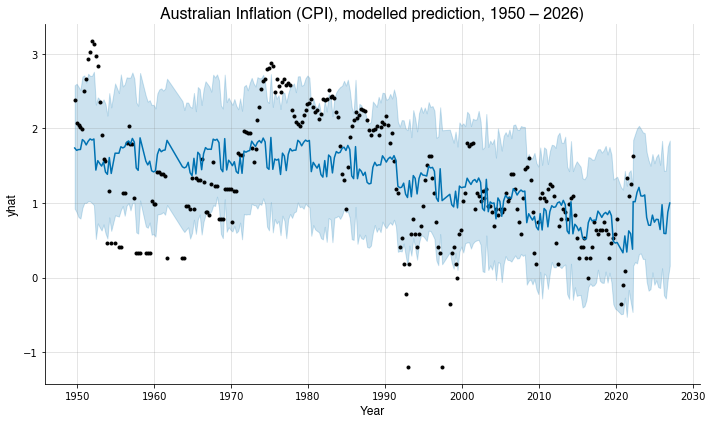

In [162]:
# Plot forecast

model.plot(forecast);

# Font families
font_1 = {'family':'helvetica','color':'black','size':16}
font_2 = {'family':'helvetica','color':'black','size':12}

# Labels
plt.title("Australian Inflation (CPI), modelled prediction, 1950 – 2026)", fontdict = font_1)
plt.xlabel("Year", fontdict = font_2)
plt.ylabel("yhat", fontdict = font_2)

# Aesthetics
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()

# Show/save
plt.savefig("/Users/minoperic/Data Analytics/Data Investigations/forecasting-inflation/Images/inflation_prediction_model.png", 
           transparent=False, dpi=300)
plt.show()

In [163]:
# Finalise visualisation
# Set 'ds' as index for both dataframes

df.set_index('ds', inplace=True)
forecast.set_index('ds', inplace=True)

In [164]:
# Combine both dataframes

vis_df = df.join(forecast[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')
vis_df.head()

,y,yhat,yhat_lower,yhat_upper
ds,,,,
1949-09-01,2.379546,1.736924,0.924557,2.577723
1949-12-01,2.066863,1.705769,0.876867,2.598055
1950-03-01,2.041220,1.715949,0.811065,2.557978
1950-06-01,2.014903,1.717359,0.792243,2.512799
1950-09-01,1.987874,1.850206,0.934485,2.692962


In [165]:
# Rescale columns to get same scale

vis_df['yhat_rescaled'] = np.exp(vis_df['yhat'])
vis_df.head()

,y,yhat,yhat_lower,yhat_upper,yhat_rescaled
ds,,,,,
1949-09-01,2.379546,1.736924,0.924557,2.577723,5.679845
1949-12-01,2.066863,1.705769,0.876867,2.598055,5.505618
1950-03-01,2.041220,1.715949,0.811065,2.557978,5.561954
1950-06-01,2.014903,1.717359,0.792243,2.512799,5.569800
1950-09-01,1.987874,1.850206,0.934485,2.692962,6.361130


<AxesSubplot:xlabel='ds'>

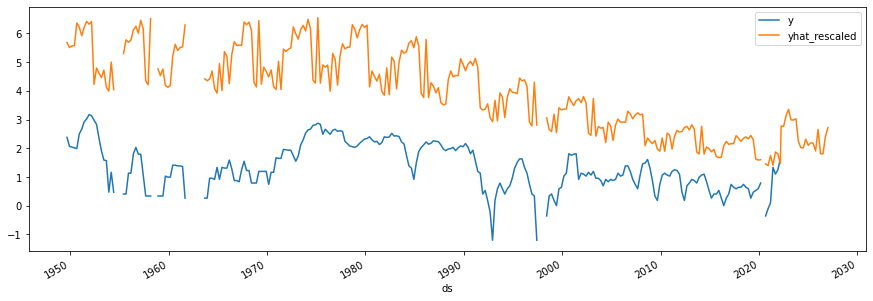

In [166]:
# Plot 'y' and 'yhat_rescaled'

vis_df[['y', 'yhat_rescaled']].plot()

In [167]:
# Ensure original and model data are connected

df.index = pd.to_datetime(df.index) #make sure our index as a datetime object
connect_date = df.index[-2] #select the 2nd to last date

In [168]:
# Mask forecast data

mask = (forecast.index > connect_date)
predict_df = forecast.loc[mask]

In [169]:
# Preview prediction

predict_df.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,,,,
2022-03-01,1.202913,-0.460843,1.220063,1.202913,1.202913,-0.822533,-0.822533,-0.822533,-0.416302,-0.416302,...,-0.236155,-0.236155,-0.236155,-0.170076,-0.170076,-0.170076,0.0,0.0,0.0,0.380381
2022-03-31,1.200740,0.157934,1.844536,1.200740,1.200740,-0.181684,-0.181684,-0.181684,-0.416302,-0.416302,...,0.084586,0.084586,0.084586,0.150031,0.150031,0.150031,0.0,0.0,0.0,1.019055
2022-06-30,1.194146,0.209160,1.923415,1.194146,1.194146,-0.177994,-0.177994,-0.177994,-0.416302,-0.416302,...,0.084586,0.084586,0.084586,0.153721,0.153721,0.153721,0.0,0.0,0.0,1.016152
2022-09-30,1.187481,0.190786,1.998619,1.187481,1.187481,-0.045596,-0.045596,-0.045596,-0.416302,-0.416302,...,0.189275,0.189275,0.189275,0.181431,0.181431,0.181431,0.0,0.0,0.0,1.141885
2022-12-31,1.180815,0.317117,2.034468,1.180751,1.180867,0.028977,0.028977,0.028977,-0.416302,-0.416302,...,0.189280,0.189280,0.189280,0.255999,0.255999,0.255999,0.0,0.0,0.0,1.209792


In [170]:
# Create updated dataframe

vis_df = df.join(predict_df[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')
vis_df['yhat_scaled']=np.exp(vis_df['yhat'])

In [171]:
# Preview head

vis_df.head()

,y,yhat,yhat_lower,yhat_upper,yhat_scaled
ds,,,,,
1949-09-01,2.379546,NaN,NaN,NaN,NaN
1949-12-01,2.066863,NaN,NaN,NaN,NaN
1950-03-01,2.041220,NaN,NaN,NaN,NaN
1950-06-01,2.014903,NaN,NaN,NaN,NaN
1950-09-01,1.987874,NaN,NaN,NaN,NaN


In [172]:
# Preview tail

vis_df.tail()

,y,yhat,yhat_lower,yhat_upper,yhat_scaled
ds,,,,,
2025-12-31,NaN,0.977302,0.125942,1.833290,2.657277
2026-03-31,NaN,0.592459,-0.236134,1.430728,1.808429
2026-06-30,NaN,0.589555,-0.280145,1.434892,1.803186
2026-09-30,NaN,0.877127,-0.012127,1.755047,2.403983
2026-12-31,NaN,0.999244,0.160715,1.836604,2.716227


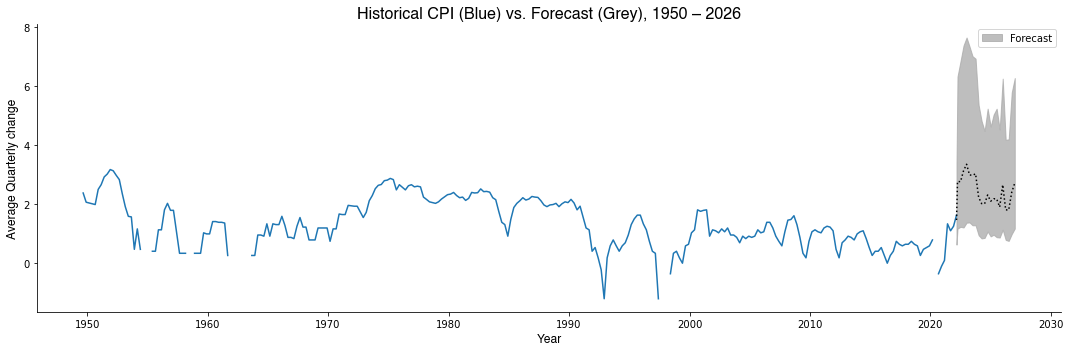

In [174]:
# Plot final visualisation

# Plot
fig, ax1 = plt.subplots()
ax1.plot(vis_df.y)
ax1.plot(vis_df.yhat_scaled, color='black', linestyle=':')

# Fill
ax1.fill_between(vis_df.index, np.exp(vis_df['yhat_upper']), np.exp(vis_df['yhat_lower']), alpha=0.75, 
                 color='darkgray', label = 'Forecast')

# Font families
font_1 = {'family':'helvetica','color':'black','size':16}
font_2 = {'family':'helvetica','color':'black','size':12}

# Labels
ax1.set_title('Historical CPI (Blue) vs. Forecast (Grey), 1950 – 2026', fontdict = font_1)
ax1.set_ylabel('Average Quarterly change', fontdict = font_2)
ax1.set_xlabel('Year', fontdict = font_2)

# Legend
plt.legend(title='', loc='upper right', ncol=1)

# Aesthetics
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()

# Show/save
plt.savefig("/Users/minoperic/Data Analytics/Data Investigations/forecasting-inflation/Images/inflation_forecast.png", 
            transparent=False, dpi=300)
plt.show()